In [1]:
import os

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines3 import TD3
from stable_baselines3 import DQN

from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.utils import set_random_seed

from stable_baselines3.common import results_plotter
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.callbacks import BaseCallback

from sklearn.gaussian_process import GaussianProcessRegressor

In [2]:
np.pi

3.141592653589793

In [4]:
env = gym.make('CartPole-v1') #('CartPole-v1', render_mode="human")
status = env.observation_space.shape[0]
actions = env.action_space.n

D = []
X_train = []
Y_train = []

episodes = 100
for episode in range(1, episodes+1):
    obs, _ = env.reset()
    done = False
    score = 0

    while not done:
        # time.sleep(0.5)
        env.render()
        action = np.random.choice([0,1])
        new_obs, reward, done, truncated, info = env.step(action)
        print(obs[2])
        D.append([round(obs[2],2), action, round(new_obs[2],2)])
        obs = new_obs
        score += reward
    # print('Episode:{} Score:{}'.format(episode, score))

0.0
0.0
0.0058536585
0.017560976
0.023451628
0.023600418
0.029748987
0.030194607
0.024977218
0.014099663
-0.0024720847
-0.013102156
-0.029601444
-0.040330064
-0.04539447
-0.05656139
-0.062167466
-0.07397298
-0.08032909
-0.09298648
-0.11198108
-0.13738349
-0.16929685
-0.20785369
-0.2416955
-0.28252843
-0.31917742
-0.35195968
-0.39220282
-0.42911714
-0.47373503
-0.5261475
-0.57618433
-0.6342249
-0.70032436
-0.76532334
-0.8384652
-0.91156316
-0.98522264
-1.0600395
-1.1427603
-1.2332038
-1.3265563
-1.4271319
-1.5345975
-1.6485611
-1.7685667
-1.894937
-2.0283728
-2.1695397
-2.3190405
-2.4710891
-2.632231
-2.7936254
-2.9538186
-3.1221986
0.0
0.0
0.0058536585
0.017560976
0.035158716
0.04701424
0.053241685
0.053919263
0.060776733
0.07381794
0.08140029
0.09528292
0.103845805
0.118831374
0.14028642
0.1566784
0.16816087
0.17485309
0.17683944
0.17416942
0.17835625
0.18938641
0.20727953
0.23208733
0.26389137
0.30279946
0.3376946
0.3688828
0.3966439
0.42123166
0.45355615
0.48312402
0.5205826
0.55578

d:\anacoda3\envs\RL-env\lib\site-packages\gymnasium\envs\classic_control\cartpole.py:265: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(


In [5]:
D

[[0.0, 0, 0.0],
 [0.0, 0, 0.01],
 [0.01, 1, 0.02],
 [0.02, 1, 0.02],
 [0.02, 0, 0.02],
 [0.02, 1, 0.03],
 [0.03, 1, 0.03],
 [0.03, 1, 0.02],
 [0.02, 1, 0.01],
 [0.01, 0, -0.0],
 [-0.0, 1, -0.01],
 [-0.01, 0, -0.03],
 [-0.03, 0, -0.04],
 [-0.04, 1, -0.05],
 [-0.05, 0, -0.06],
 [-0.06, 1, -0.06],
 [-0.06, 0, -0.07],
 [-0.07, 1, -0.08],
 [-0.08, 1, -0.09],
 [-0.09, 1, -0.11],
 [-0.11, 1, -0.14],
 [-0.14, 1, -0.17],
 [-0.17, 0, -0.21],
 [-0.21, 1, -0.24],
 [-0.24, 0, -0.28],
 [-0.28, 0, -0.32],
 [-0.32, 1, -0.35],
 [-0.35, 0, -0.39],
 [-0.39, 1, -0.43],
 [-0.43, 1, -0.47],
 [-0.47, 0, -0.53],
 [-0.53, 1, -0.58],
 [-0.58, 1, -0.63],
 [-0.63, 0, -0.7],
 [-0.7, 1, -0.77],
 [-0.77, 0, -0.84],
 [-0.84, 0, -0.91],
 [-0.91, 0, -0.99],
 [-0.99, 1, -1.06],
 [-1.06, 1, -1.14],
 [-1.14, 0, -1.23],
 [-1.23, 1, -1.33],
 [-1.33, 1, -1.43],
 [-1.43, 1, -1.53],
 [-1.53, 1, -1.65],
 [-1.65, 0, -1.77],
 [-1.77, 0, -1.89],
 [-1.89, 0, -2.03],
 [-2.03, 0, -2.17],
 [-2.17, 1, -2.32],
 [-2.32, 0, -2.47],
 [-2.4

In [6]:
D_np = np.array(D)

In [7]:
D_np_0 = D_np[D_np[:, 1] == 0]
D_np_1 = D_np[D_np[:, 1] == 1]

In [8]:
D_np_0
D_np_0.shape

(2834, 3)

In [9]:
# Split the array into two arrays
D_np_0_X_train = D_np_0[:, 0]  # Columns 0 and 1
D_np_0_Y_train = D_np_0[:, 2]   # Column 2

D_np_0_X_train = D_np_0_X_train.reshape(-1,1)

In [10]:
D_np_0_X_train = np.around(D_np_0_X_train, 2)
D_np_0_Y_train = np.around(D_np_0_Y_train, 2)

In [11]:
print(D_np_0_X_train.shape)

(2834, 1)


In [12]:
D_np_0_Y_train

array([ 0.  ,  0.01,  0.02, ..., -2.91, -3.07, -3.24])

In [13]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [14]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(D_np_0_X_train, D_np_0_Y_train)
gaussian_process.kernel_

d:\anacoda3\envs\RL-env\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


0.243**2 * RBF(length_scale=0.01)

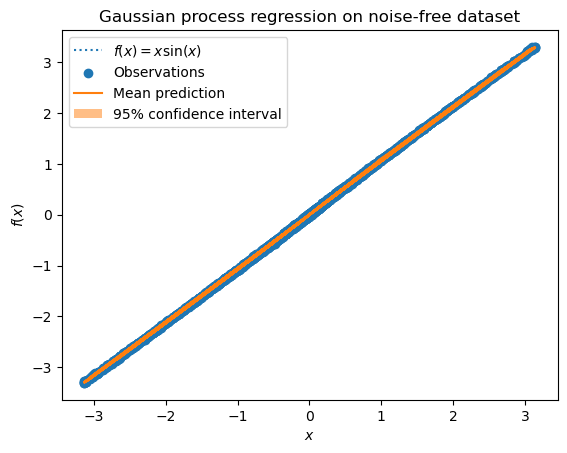

In [15]:
mean_prediction, std_prediction = gaussian_process.predict(D_np_0_X_train, return_std=True)

plt.plot(D_np_0_X_train, D_np_0_Y_train, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(D_np_0_X_train, D_np_0_Y_train, label="Observations")
plt.plot(D_np_0_X_train, mean_prediction, label="Mean prediction")
plt.fill_between(
    D_np_0_X_train.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

In [7]:
Y_train

[0.0,
 0.01,
 0.01,
 0.0,
 -0.01,
 -0.03,
 -0.05,
 -0.07,
 -0.09,
 -0.12,
 -0.16,
 -0.2,
 -0.24,
 -0.28,
 -0.31,
 -0.34,
 -0.38,
 -0.42,
 -0.46,
 -0.5,
 -0.54,
 -0.59,
 -0.63,
 -0.68,
 -0.74,
 -0.79,
 -0.85,
 -0.9,
 -0.97,
 -1.04,
 -1.12,
 -1.2,
 -1.3,
 -1.4,
 -1.5,
 -1.61,
 -1.73,
 -1.85,
 -1.98,
 -2.11,
 -2.25,
 -2.4,
 -2.55,
 -2.7,
 -2.86,
 -3.02,
 3.11,
 2.96,
 2.8,
 2.64,
 2.48,
 2.32,
 2.15,
 2.0,
 1.85,
 1.71,
 1.57,
 1.44,
 1.32,
 1.2,
 1.08,
 0.97,
 0.87,
 0.77,
 0.68,
 0.6,
 0.52,
 0.44,
 0.35,
 0.27,
 0.2,
 0.13,
 0.05,
 -0.02,
 -0.1,
 -0.18,
 -0.27,
 -0.37,
 -0.48,
 -0.58,
 -0.67,
 -0.78,
 -0.89,
 -0.99,
 -1.1,
 -1.22,
 -1.34,
 -1.46,
 -1.6,
 -1.73,
 -1.88,
 -2.03,
 -2.18,
 -2.35,
 -2.52,
 -2.69,
 -2.86,
 -3.03,
 3.08,
 2.91,
 2.75,
 2.58,
 2.42,
 2.27,
 2.11,
 1.97,
 1.83,
 1.7,
 1.57,
 1.45,
 1.33,
 1.22,
 1.11,
 1.01,
 0.92,
 0.83,
 0.75,
 0.68,
 0.61,
 0.54,
 0.48,
 0.43,
 0.38,
 0.34,
 0.28,
 0.24,
 0.19,
 0.14,
 0.1,
 0.05,
 0.01,
 -0.04,
 -0.08,
 -0.13,
 -0.18,
 -0.2

In [ ]:

gaussian_process = GaussianProcessRegressor(kernel=)

In [2]:
def make_env(env_id: str, rank: int, seed: int = 0, render_mode = None):
    """
    Utility function for multiprocessed env.

    :param env_id: the environment ID
    :param num_env: the number of environments you wish to have in subprocesses
    :param seed: the inital seed for RNG
    :param rank: index of the subprocess
    """
    def _init():
        env = gym.make(env_id, render_mode=render_mode) #gym.make(env_id, render_mode="human")
        env.reset(seed=seed + rank)
        return env
    set_random_seed(seed)
    return _init

if __name__ == "__main__":
    env_id = "CartPole-v1"
    num_cpu = 4  # Number of processes to use
    # Create the vectorized environment
    vec_env = SubprocVecEnv([make_env(env_id, i) for i in range(num_cpu)])
    # env = gym.make(env_id)
    # print(vec_env)

    # Stable Baselines provides you with make_vec_env() helper
    # which does exactly the previous steps for you.
    # You can choose between `DummyVecEnv` (usually faster) and `SubprocVecEnv`
    # env = make_vec_env(env_id, n_envs=num_cpu, seed=0, vec_env_cls=SubprocVecEnv)

    model = PPO("MlpPolicy", vec_env, verbose=1)
    model.learn(total_timesteps=250_000)

    vec_env = SubprocVecEnv([make_env(env_id, i, render_mode="human") for i in range(num_cpu)])
    # env = gym.make(env_id, render_mode="human")
    
    for _ in range(1000):
        obs= vec_env.reset()
        done = False
        while not done:
            action, _states = model.predict(obs)
            print(action)
            obs, rewards, done, info, _ = vec_env.step(action)
            # vec_env.render()

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 4690 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 8192 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 2315        |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.007924207 |
|    clip_fraction        | 0.0659      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.687      |
|    explained_variance   | -0.012      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.333       |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00408    |
|    value_loss           | 2.02        |
-----------------------------------------
-----------------

ValueError: not enough values to unpack (expected 5, got 4)

In [4]:
obs = vec_env.reset()
obs_2_values = []
for _ in range(1000):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = vec_env.step(action)
    obs_2_values.append(obs[2])
    vec_env.render()

In [6]:
import matplotlib.pyplot as plt

In [25]:
obs_2_array = np.array(obs_2_values).T

In [28]:
obs_2_array[2]

array([ 3.14159274e+00,  3.13573909e+00,  3.12403178e+00,  3.10650778e+00,
        3.08324242e+00,  3.05435038e+00,  3.01998758e+00,  2.98035359e+00,
        2.93569374e+00,  2.88630152e+00,  2.83251834e+00,  2.77473521e+00,
        2.71338987e+00,  2.64896536e+00,  2.58587575e+00,  2.52722549e+00,
        2.46707463e+00,  2.41118765e+00,  2.36144280e+00,  2.31564999e+00,
        2.27527881e+00,  2.24058628e+00,  2.21051693e+00,  2.18869042e+00,
        2.17492485e+00,  2.16930437e+00,  2.16977906e+00,  2.17836022e+00,
        2.19505119e+00,  2.21987319e+00,  2.25286460e+00,  2.29407787e+00,
        2.34357524e+00,  2.40142298e+00,  2.46768212e+00,  2.54239750e+00,
        2.62558246e+00,  2.71719980e+00,  2.81578493e+00,  2.92246938e+00,
        3.03691339e+00, -3.12456417e+00, -2.99626803e+00, -2.86224747e+00,
       -2.72354388e+00, -2.58134627e+00, -2.43693638e+00, -2.29882216e+00,
       -2.16609669e+00, -2.03627920e+00, -1.91437304e+00, -1.79890001e+00,
       -1.68923378e+00, -

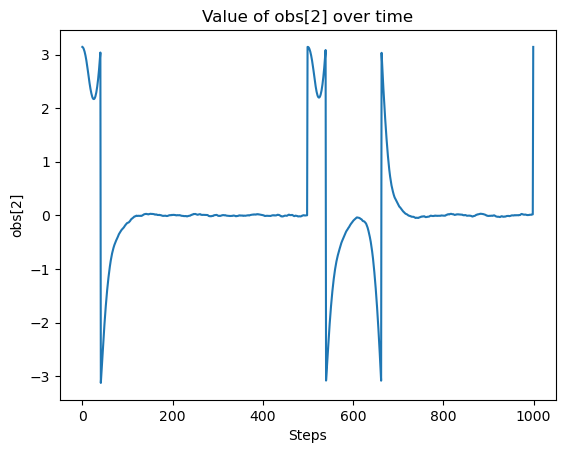

In [32]:
plt.plot(obs_2_array[2])
plt.xlabel('Steps')
plt.ylabel('obs[2]')
plt.title('Value of obs[2] over time')
plt.show()

In [ ]:
# env = gym.make(env_id, render_mode="human")
# # status = env.observation_space.shape[0]
# actions = env.action_space.n

# episodes = 1000
# for episode in range(1, episodes+1):
#     obs = env.reset()
#     done = False
#     score = 0


#     while not done:
#         env.render()
#         action, _states = model.predict(obs)
#         obs, reward, done, truncated, info = env.step(action)
#         score += reward
#     print('Episode:{} Score:{}'.format(episode, score))

Num timesteps: 1000
Best mean reward: -inf - Last mean reward per episode: 23.64
Saving new best model to tmp/best_model
Num timesteps: 2000
Best mean reward: 23.64 - Last mean reward per episode: 24.68
Saving new best model to tmp/best_model
Num timesteps: 3000
Best mean reward: 24.68 - Last mean reward per episode: 26.29
Saving new best model to tmp/best_model
Num timesteps: 4000
Best mean reward: 26.29 - Last mean reward per episode: 26.36
Saving new best model to tmp/best_model
Num timesteps: 5000
Best mean reward: 26.36 - Last mean reward per episode: 28.51
Saving new best model to tmp/best_model
Num timesteps: 6000
Best mean reward: 28.51 - Last mean reward per episode: 32.71
Saving new best model to tmp/best_model
Num timesteps: 7000
Best mean reward: 32.71 - Last mean reward per episode: 37.10
Saving new best model to tmp/best_model
Num timesteps: 8000
Best mean reward: 37.10 - Last mean reward per episode: 43.54
Saving new best model to tmp/best_model
Num timesteps: 9000
Best 

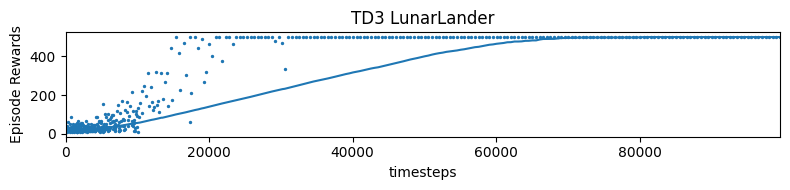

In [7]:
class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq:
    :param log_dir: Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: Verbosity level: 0 for no output, 1 for info messages, 2 for debug messages
    """
    def __init__(self, check_freq: int, log_dir: str, verbose: int = 1):
        super().__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, "best_model")
        self.best_mean_reward = -np.inf

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:

          # Retrieve training reward
          x, y = ts2xy(load_results(self.log_dir), "timesteps")
          if len(x) > 0:
              # Mean training reward over the last 100 episodes
              mean_reward = np.mean(y[-100:])
              if self.verbose >= 1:
                print(f"Num timesteps: {self.num_timesteps}")
                print(f"Best mean reward: {self.best_mean_reward:.2f} - Last mean reward per episode: {mean_reward:.2f}")

              # New best model, you could save the agent here
              if mean_reward > self.best_mean_reward:
                  self.best_mean_reward = mean_reward
                  # Example for saving best model
                  if self.verbose >= 1:
                    print(f"Saving new best model to {self.save_path}")
                  self.model.save(self.save_path)

        return True

# Create log dir
log_dir = "tmp/"
os.makedirs(log_dir, exist_ok=True)

# Create and wrap the environment
# env = gym.make("LunarLanderContinuous-v2")
# env = Monitor(env, log_dir)

env_id = "CartPole-v1"
num_cpu = 4  # Number of processes to use
# Create and wrap the environment
env = gym.make(env_id)
env = Monitor(env, log_dir)


# Add some action noise for exploration
# n_actions = env.action_space.shape[-1]
# action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))
# Because we use parameter noise, we should use a MlpPolicy with layer normalization
# model = TD3("MlpPolicy", env, action_noise=action_noise, verbose=0)
model = PPO("MlpPolicy", env, verbose=0)
# Create the callback: check every 1000 steps
callback = SaveOnBestTrainingRewardCallback(check_freq=1000, log_dir=log_dir)
# Train the agent
timesteps = 1e5
model.learn(total_timesteps=int(timesteps), callback=callback)

plot_results([log_dir], timesteps, results_plotter.X_TIMESTEPS, "TD3 LunarLander")
plt.show()

In [3]:
env = gym.make('CartPole-v1',render_mode="rgb_array")
status = env.observation_space.shape[0]
actions = env.action_space.n

In [4]:
actions

2

In [14]:
episodes = 10
for episode in range(1, episodes+1):
    status = env.reset()
    done = False
    score = 0


    while not done:
        env.render()
        action = random.choice([0,1])
        observation, reward, done, truncated, info = env.step(action)
        score += reward
    print('Episode:{} Score:{}'.format(episode, score))

Episode:1 Score:12.0
Episode:2 Score:18.0
Episode:3 Score:11.0
Episode:4 Score:12.0
Episode:5 Score:12.0
Episode:6 Score:13.0
Episode:7 Score:27.0
Episode:8 Score:12.0
Episode:9 Score:12.0
Episode:10 Score:24.0


In [11]:
truncated

False

In [3]:
observation, info = env.reset(seed=42)

for _ in range(1000):
    env.render()
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())

    if terminated or truncated:
        observation, info = env.reset()

env.close()



d:\anacoda3\envs\RL-env\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
